In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load

In [10]:
data = pd.read_excel('../Proteomics6_GFP_Cdc42_coIP.xlsx', sheet_name='GFP-Cdc42 vs GFP')

## Volcano plot

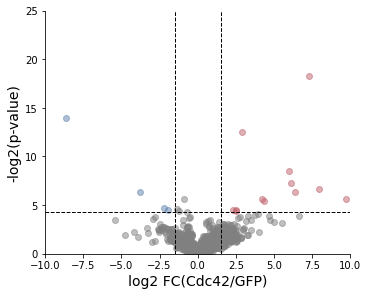

In [11]:
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count_pos = 0
count_neg = 0

for i in data.index:
    
    if data.loc[i, 'Fold Change (GFP-CDC42/GFP)'] >=1.5 and data.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=data.loc[i, 'Fold Change (GFP-CDC42/GFP)'], y=data.loc[i, 'p-value'], alpha=.5, c='#BF616A')
        
        count_pos += 1
        
    elif data.loc[i, 'Fold Change (GFP-CDC42/GFP)'] <=-1.5 and data.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=data.loc[i, 'Fold Change (GFP-CDC42/GFP)'], y=data.loc[i, 'p-value'], alpha=.5, c='#5E81AC')    
    
        count_neg += 1
        
    else: 
        plt.scatter(x=data.loc[i, 'Fold Change (GFP-CDC42/GFP)'], y=data.loc[i, 'p-value'], alpha=.5, c='gray')    
    
    
plt.axhline(y=-np.log2(0.05), color='k', linestyle='dashed', linewidth=1)
plt.axvline(x=-1.5, color='k', linestyle='dashed', linewidth=1)
plt.axvline(x=1.5, color='k', linestyle='dashed', linewidth=1)

plt.xlim(-10,10)
plt.ylim(0, 25)

plt.ylabel('-log2(p-value)', fontdict={'size': 14})
plt.xlabel('log2 FC(Cdc42/GFP)', fontdict={'size': 14})

plt.savefig('./volcano.png', dpi=300)

plt.show()

## Hits export

In [16]:
hits = data[(data['Fold Change (GFP-CDC42/GFP)'] >= 1) & (data['p-value'] >= -np.log2(0.1))]

In [17]:
hits['Gene Symbol'].to_clipboard(index=False)

## Network table

In [18]:
# Create table for network

ntwk = hits[['Gene Symbol', 'Fold Change (GFP-CDC42/GFP)', 'p-value', 'Score']]

ntwk.loc[:, 'target'] = 'Cdc42-GFP'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [19]:
ntwk = ntwk.rename(columns={'Gene Symbol': 'source'})

In [20]:
with pd.ExcelWriter('../Proteomics6_GFP_Cdc42_coIP.xlsx', engine='openpyxl', mode='a') as writer:
    
    ntwk.to_excel(writer, sheet_name='data_for_network')